## 0. Constants

In [1]:
REVIEWS_DATA = "../data/reviews.csv"

---
## 1. Imports

In [31]:
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import re

In [4]:
df = pd.read_csv(REVIEWS_DATA, index_col=0)

In [5]:
df.head()

,reviews
0,i have flown with ba for many years and there ...
1,boarding at mumbai was chaotic and badly organ...
2,"mexico city airport is a zoo, but taking the l..."
3,"y poor service, very frustrating. firstly my f..."
4,"generally poor. sent to gate on time, sat mayb..."


---
## 2. Sentiment Analysis

In [6]:
#remove punctuation
df['reviews'] = df['reviews'].str.replace('[^\w\s]','')

C:\Users\MR\AppData\Local\Temp\ipykernel_19196\4020233655.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('[^\w\s]','')


In [11]:
#tokenization
df['tokenized_reviews'] = df.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
df.head()

,reviews,tokenized_reviews
0,i have flown with ba for many years and there ...,"[i, have, flown, with, ba, for, many, years, a..."
1,boarding at mumbai was chaotic and badly organ...,"[boarding, at, mumbai, was, chaotic, and, badl..."
2,mexico city airport is a zoo but taking the la...,"[mexico, city, airport, is, a, zoo, but, takin..."
3,y poor service very frustrating firstly my fli...,"[y, poor, service, very, frustrating, firstly,..."
4,generally poor sent to gate on time sat maybe ...,"[generally, poor, sent, to, gate, on, time, sa..."


In [8]:
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MR\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [12]:
#stop words removal
df['processed_reviews'] = df['tokenized_reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
df.head()

,reviews,tokenized_reviews,processed_reviews
0,i have flown with ba for many years and there ...,"[i, have, flown, with, ba, for, many, years, a...",flown ba many years time 10 years ago getting ...
1,boarding at mumbai was chaotic and badly organ...,"[boarding, at, mumbai, was, chaotic, and, badl...",boarding mumbai chaotic badly organised board ...
2,mexico city airport is a zoo but taking the la...,"[mexico, city, airport, is, a, zoo, but, takin...",mexico city airport zoo taking late departure ...
3,y poor service very frustrating firstly my fli...,"[y, poor, service, very, frustrating, firstly,...",poor service frustrating firstly flight lhr ca...
4,generally poor sent to gate on time sat maybe ...,"[generally, poor, sent, to, gate, on, time, sa...",generally poor sent gate time sat maybe 30 min...


In [10]:
def polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

    
def tagging(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'

In [14]:
df['polarity'] = df['processed_reviews'].apply(polarity)
df['tag'] = df['polarity'].apply(tagging)
df.head()

,reviews,tokenized_reviews,processed_reviews,polarity,tag
0,i have flown with ba for many years and there ...,"[i, have, flown, with, ba, for, many, years, a...",flown ba many years time 10 years ago getting ...,0.070000,Positive
1,boarding at mumbai was chaotic and badly organ...,"[boarding, at, mumbai, was, chaotic, and, badl...",boarding mumbai chaotic badly organised board ...,0.170686,Positive
2,mexico city airport is a zoo but taking the la...,"[mexico, city, airport, is, a, zoo, but, takin...",mexico city airport zoo taking late departure ...,0.146512,Positive
3,y poor service very frustrating firstly my fli...,"[y, poor, service, very, frustrating, firstly,...",poor service frustrating firstly flight lhr ca...,-0.112626,Negative
4,generally poor sent to gate on time sat maybe ...,"[generally, poor, sent, to, gate, on, time, sa...",generally poor sent gate time sat maybe 30 min...,0.020833,Positive


In [17]:
df["tag"].value_counts()

Positive    1731
Negative     751
Neutral       18
Name: tag, dtype: int64

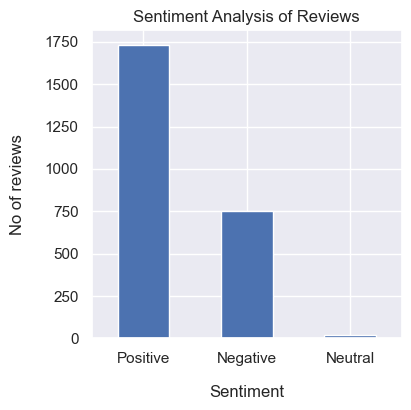

In [32]:
df['tag'].value_counts().plot(kind='bar', figsize=(4, 4), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("No of reviews", labelpad=14)
plt.title("Sentiment Analysis of Reviews");

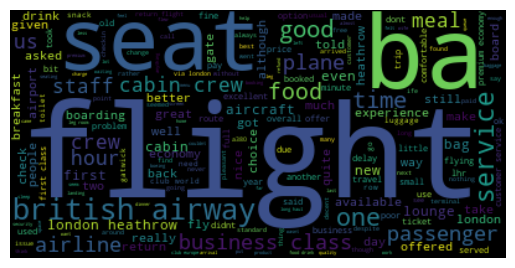

In [28]:
#display wordcloud of positive reviws
text = " "
for i in df.index:
    if df['tag'][i] == "Positive":
        text = text + df['processed_reviews'][i]
      
wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

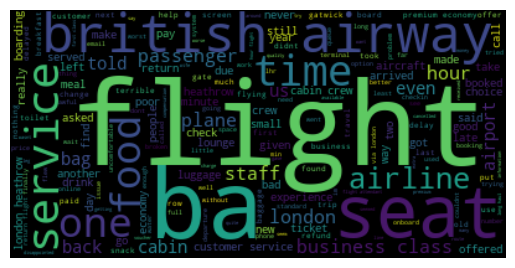

In [34]:
#display wordcloud of negative reviws
text = " "
for i in df.index:
    if df['tag'][i] == "Negative":
        text = text + df['processed_reviews'][i]
      
wordcloud_negative = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()